<br><p style="font-family: Arial; font-size:3.75em;font-style:bold">
Matplotlib: Exploring <br> <br> <br>Data Visualization II</p><br><br>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib notebook: will lead to interactive plots embedded within the notebook


%matplotlib inline: will lead to static images of your plot embedded in the notebook

In [2]:
%matplotlib inline

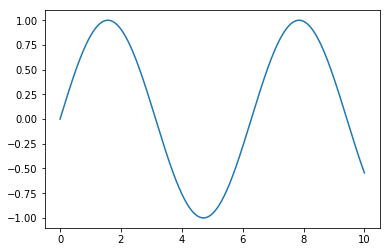

In [3]:
# MATLAB-style interface
plt.figure()  # create a plot figure
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x))


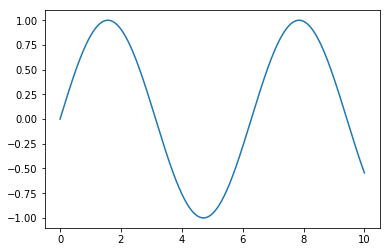

In [4]:
# Object-oriented interface

# First create a grid of plots
fig, ax = plt.subplots()
# Call plot() method on the appropriate object
ax.plot(x, np.sin(x))


## Customizing Plot Legends

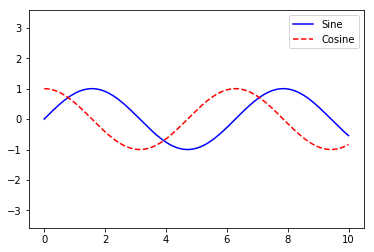

In [5]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

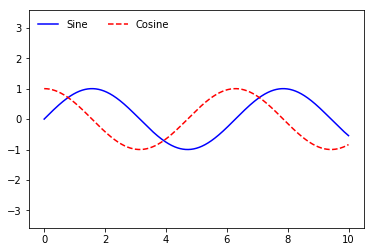

In [6]:
# Specify location and number of columns
# turn of the frame


ax.legend(loc='upper left', frameon=False, ncol = 2)
fig

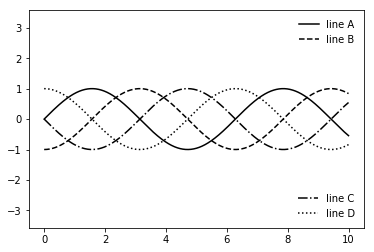

In [7]:
# Multiple Legends

fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

## Multiple Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create. The lowest level of these is plt.subplot(), which creates a single subplot within a grid. As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

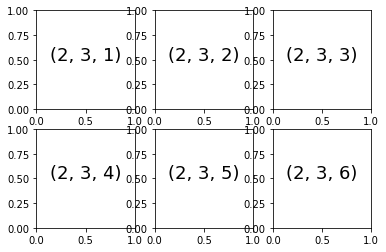

In [8]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

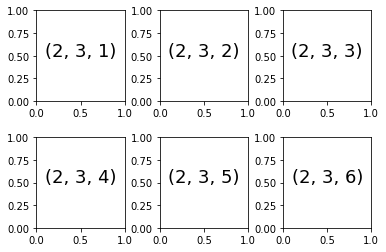

In [9]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
               fontsize=18, ha='center')

Share y- and x-axis

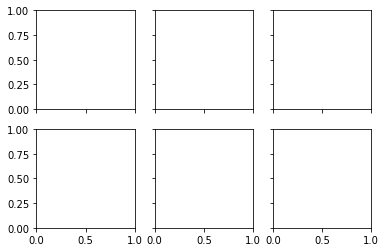

In [10]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

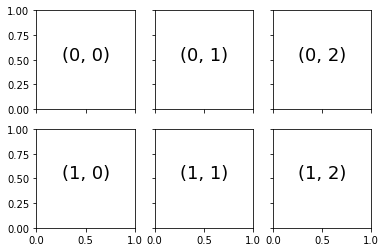

In [11]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

## Text and Annotation

In [12]:
births = pd.read_csv('births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2016, month, day)
                        for (month, day) in births_by_date.index] # considering leap year

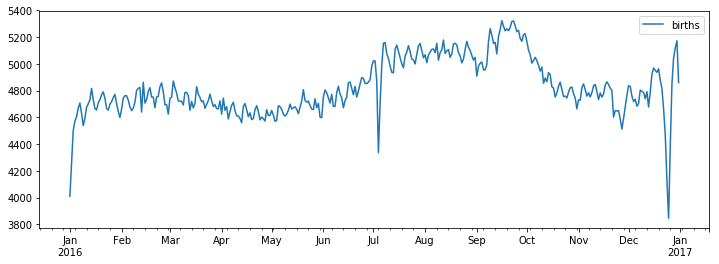

In [13]:
births_by_date.plot(figsize = (12,4))


When we're communicating data like this, it is often useful to annotate certain features of the plot to draw the reader's attention. This can be done manually with the plt.text/ax.text command, which will place text at a particular x/y value:

[Text(0, 0.5, 'average daily births'),
 Text(0.5, 1.0, 'USA births by day of year (1969-1988)')]

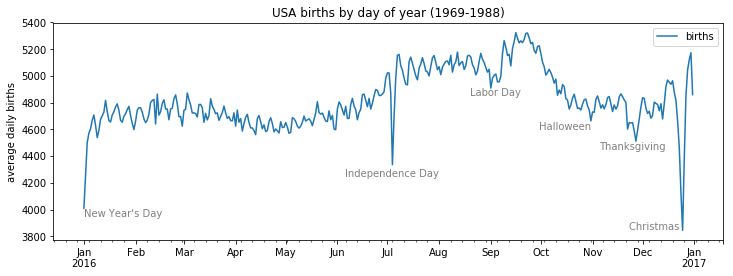

In [14]:

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2016-1-1', 3950, "New Year's Day", **style)
ax.text('2016-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2016-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2016-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2016-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2016-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')


## Arrows and Annotation

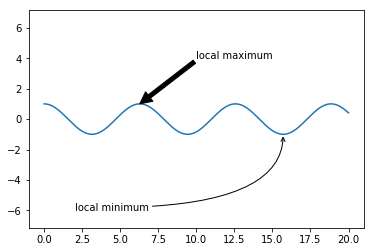

In [15]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black'))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

## Visualization with Seaborn

In [16]:

# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

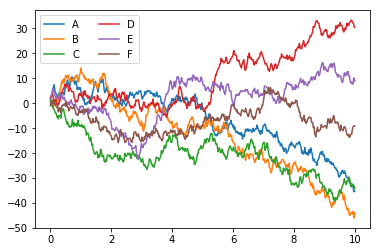

In [17]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling Seaborn's set() method. By convention, Seaborn is imported as sns

In [18]:
import seaborn as sns
sns.set()

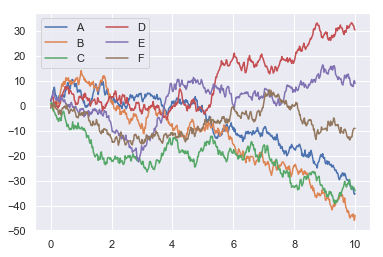

In [19]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Histograms and densities

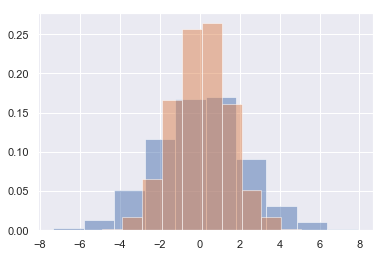

In [20]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

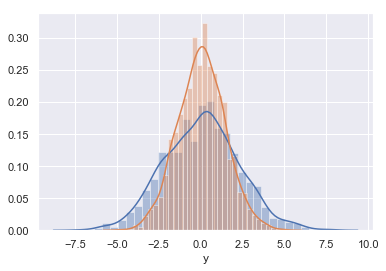

In [21]:
# Kernel density and histograms plotted together

sns.distplot(data['x'])
sns.distplot(data['y']);

### Pair Plot

In [22]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


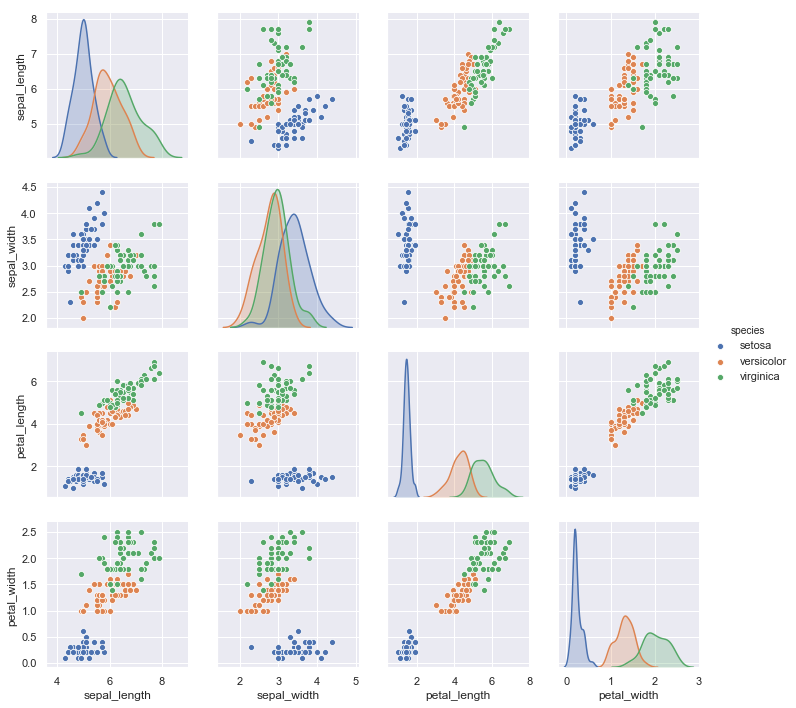

In [23]:
sns.pairplot(iris, hue='species');

### Faceted histograms

In [24]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


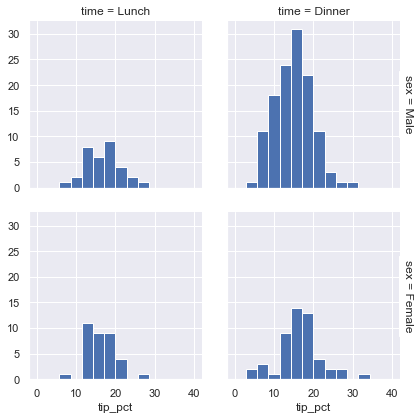

In [25]:

tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor Plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

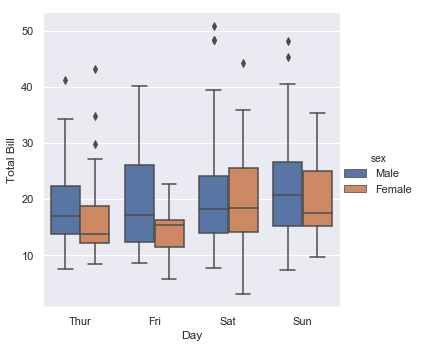

In [26]:

g = sns.catplot("day", "total_bill", "sex", data=tips, kind = 'box')
g.set_axis_labels("Day", "Total Bill");

### Joint distributions

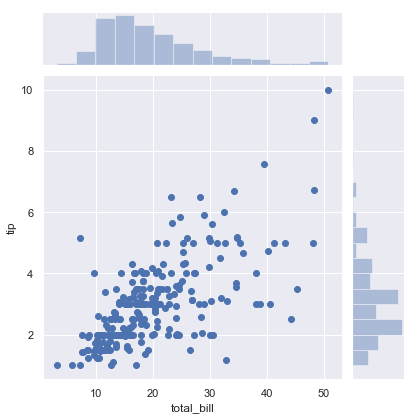

In [27]:
sns.jointplot("total_bill", "tip", data=tips)

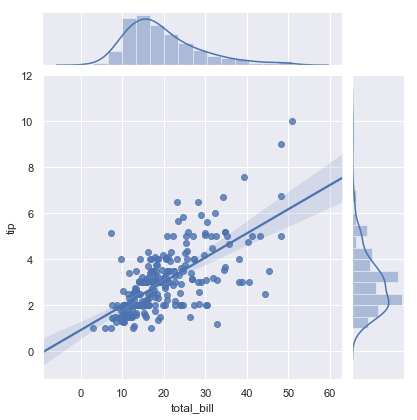

In [28]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg')